# Pretrained Models - Kunskapskontroll

In [1]:
!nvidia-smi

Fri May 10 07:12:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf

# List physical devices that are recognized by TensorFlow
print("Available devices:", tf.config.list_physical_devices())
print("Is GPU available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is GPU available: True


**Obligatoriskt att fylla i uppgifterna nedan.**

Namn:
Robert Shaw
Vem du har presenterat för: Lina Shideda

Datum då du presenterade: 08 mai

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation:
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 3s 0us/step


In [76]:
# img_path = 'tennisboll.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
# img

In [5]:
image_paths = ['tennisboll.jpg', 'Coke_bottle.jpg', 'Glass.jpg']

# Function to load and preprocess the image
def load_and_preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

images = [load_and_preprocess_img(path) for path in image_paths]
for img in images:
    print(img.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


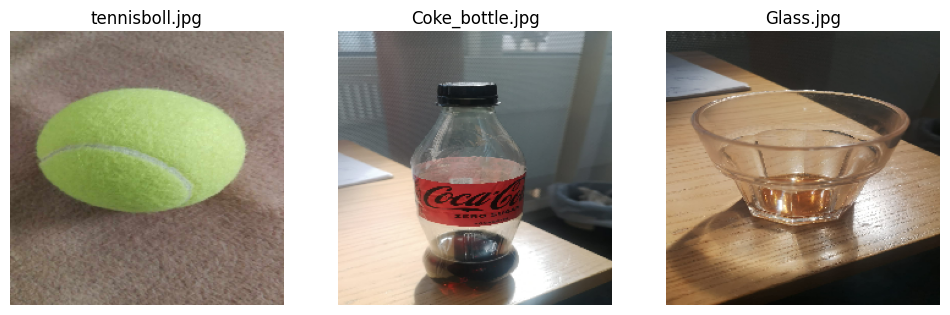

In [6]:
fig, axes = plt.subplots(1, len(image_paths), figsize=(12, 5))
for ax, img_path in zip(axes, image_paths):
    img = image.load_img(img_path, target_size=(224, 224))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(img_path)
plt.show()

In [80]:
# x = image.img_to_array(img)
# x.shape

In [51]:
# x = np.expand_dims(x, axis=0)
# x.shape

(1, 224, 224, 3)

In [43]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
# x = preprocess_input(x)

In [7]:
images_batch = np.vstack(images)
preds = model.predict(images_batch)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3))

35363/35363 [==============================] - 0s 0us/step
Predicted: [[('n04409515', 'tennis_ball', 0.999997), ('n04039381', 'racket', 2.78929e-06), ('n03942813', 'ping-pong_ball', 5.5036452e-08)], [('n04557648', 'water_bottle', 0.2168528), ('n02877765', 'bottlecap', 0.19374542), ('n03983396', 'pop_bottle', 0.16317552)], [('n07930864', 'cup', 0.44117615), ('n04263257', 'soup_bowl', 0.15694463), ('n03775546', 'mixing_bowl', 0.0717617)]]


# 1. Take some pictures yourself and predict their class.

Did it above

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

* Pretrained models is a very powerful concept as it uses existing templates to save time and money for building new models. Given they are trained on large datasets, this saves time later on in terms of both data collection, processing and model runtimes.

* It underscores the fact that the patterns found in many image and video objects share basic feature similarities and can thus be reused, including the idea that natural images contain spatial correlations such as having the same edges or horizontal lines.